In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches

In [2]:
from premise.geomap import Geomap

# Import data

In [6]:
df_SPS1_NPi = pd.read_parquet('../LCA results/remind-SSP2-NPi-stem-SPS1.gzip')
df_SPS1_PkBudg500 = pd.read_parquet('../LCA results/remind-SSP2-PkBudg500-stem-SPS1.gzip')
df_SPS1_Budg1150 = pd.read_parquet('../LCA results/remind-SSP2-PkBudg1150-stem-SPS1.gzip')

df_SPS4_NPi = pd.read_parquet('../LCA results/remind-SSP2-NPi-stem-SPS4.gzip')
df_SPS4_PkBudg500 = pd.read_parquet('../LCA results/remind-SSP2-PkBudg500-stem-SPS4.gzip')
df_SPS4_Budg1150 = pd.read_parquet('../LCA results/remind-SSP2-PkBudg1150-stem-SPS4.gzip')

### Transform data - Group by (1) location (CH, EUR, RoW) (2) Demand and (3) category

In [7]:
df_SPS1_NPi.head()

,act_category,variable,year,region,location,model,scenario,impact_category,value
0,Manufacture of tanks reservoirs and containers...,FE_bus_diesel,2020,CH,CH,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - ecotoxicity: freshwater - co...,0.014519
1,Manufacture of tanks reservoirs and containers...,FE_bus_diesel,2020,CH,CH,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - land use - soil quality index,15.544807
2,Manufacture of tanks reservoirs and containers...,FE_bus_diesel,2020,CH,CH,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - water use - user deprivation...,-0.000231
3,Manufacture of tanks reservoirs and containers...,FE_bus_diesel,2020,CH,CH,remind,SSP2-NPi-SPS1,"ReCiPe 2016 v1.03, midpoint (H) - water use - ...",-0.000005
4,Manufacture of tanks reservoirs and containers...,FE_bus_diesel,2020,CH,CH,remind,SSP2-NPi-SPS1,Ecological Footprint - land occupation - globa...,0.174498


In [8]:
scenarios = [
    (df_SPS1_NPi, 'SSP2-NPi-SPS1'),
    (df_SPS1_PkBudg500, 'SSP2-PkBudg500-SPS1'),
    (df_SPS1_Budg1150, 'SSP2-Budg1150-SPS1'),
    (df_SPS4_NPi, 'SSP2-NPi-SPS4'),
    (df_SPS4_PkBudg500, 'SSP2-PkBudg500-SPS4'),
    (df_SPS4_Budg1150, 'SSP2-Budg1150-SPS4')
]

In [9]:
# Define the demand groups
groups_demand = {
    'Transport ': [
        'FE_bus_diesel', 'FE_cars_diesel', 'FE_cars_gasoline', 'FE_coach_diesel',
        'FE_heavy_duty_truck_diesel', 'FE_heavy_duty_truck_gas', 'FE_light_duty_truck_diesel',
        'FE_light_duty_truck_gasoline', 'FE_motorcycle_gasoline', 'FE_other_transport_diesel', 
        'FE_other_transport_gasoline',
    
        'FE_cars_hydrogen', 'FE_heavy_duty_truck_hydrogen', 'FE_light_duty_truck_hydrogen',
    
        'FE_bus_electricity', 'FE_cars_electricity', 'FE_heavy_duty_truck_electricity',
        'FE_light_duty_truck_electricity', 'FE_other_transport_electric', 'FE_tram', 'FE_trolleybus'
    ],
    'Industry': [
        'FE_industry_heat_CHP_gas', 'FE_industry_heat_CHP_oil',
        'FE_industry_heat_CHP_waste_non_renew', 'FE_industry_heat_CHP_waste_non_renew_CCS',
        'FE_industry_process_coal', 'FE_industry_process_heavy_fuel_oil',
        'FE_industry_process_light_fuel_oil', 'FE_industry_process_natural_gas', 
        'FE_industry_process_waste_non_renew', 'FE_industry_heat_DH',
    

        'FE_industry_process_FE_other_electric', 'FE_industry_process_electric_boiler', 
        'FE_industry_process_heat_pump', 'FE_industry_heat_CHP_hydrogen', 'FE_industry_process_hydrogen',
        

        'FE_industry_heat_CHP_wood', 'FE_industry_heat_CHP_wood_CCS', 'FE_industry_process_pellet',
        'FE_industry_process_wood',
    ],
    'Residential heating': [
        'FE_residential_space_heating_CHP_gas', 'FE_residential_space_heating_gas',
        'FE_residential_space_heating_light_fuel_oil', 'FE_residential_water_heating_gas',
        'FE_residential_water_heating_light_fuel_oil', 'FE_residential_space_heating_heat_pump_gas',
        'FE_residential_water_heating_heat_pump_gas', 'FE_residential_space_heating_DH',

    
        'FE_residential_space_heating_pellet', 'FE_residential_space_heating_wood',
        'FE_residential_water_heating_pellet', 'FE_residential_water_heating_wood',
        

    
        'FE_residential_water_heating_solar', 'FE_residential_space_heating_solar',

    
        'FE_residential_FE_other_electric', 'FE_residential_space_heating_electric_boiler',
        'FE_residential_space_heating_heat_pump',
        'FE_residential_water_heating_electric_boiler', 'FE_residential_water_heating_heat_pump',
    ],
    'Services': [
        'FE_services_CHP_gas', 'FE_services_light_fuel_oil', 'FE_services_natural_gas',


        'FE_services_DH',

    
        'FE_services_CHP_biogas', 'FE_services_pellet', 'FE_services_wood',

    
        'FE_services_FE_other_electric', 'FE_services_electric_boiler',
        'FE_services_heat_pump', 'FE_services_solar'
    ],
}

# Create a mapping dictionary
variable_to_group = {variable: group for group, variables in groups_demand.items() for variable in variables}

In [10]:
activity_categories = {
    'Transport': [
        'Sea and coastal freight water transport',
        'Inland freight water transport',
        'Freight air transport',
        'Transport via pipeline',
        'Other transportation support activities',
        'Freight rail transport',
        'Freight transport by road',
        'Urban and suburban passenger land transport',
        'Other passenger land transport',
    ],
    'Electricity generation': [
        'Electricity gas steam and air conditioning supply',
        'Electric power generation transmission and distribution',
        'Manufacture of gas distribution of gaseous fuels through mains',
        
    ],
    'Heat production':[
        'Steam and air conditioning supply'
    ],
    'Agriculture and forestry': [
        'Processing and preserving of fruit and vegetables',
        'Growing of cereals except rice leguminous crops and oil seeds',
        'Logging',
        'Growing of vegetables and melons roots and tubers',
        'Gathering of nonwood forest products',
        'Plant propagation',
        'Support activities for animal production',
        'Postharvest crop activities',
        'Growing of other tree and bush fruits and nuts',
        'Support activities for crop production',
        'Growing of oleaginous fruits',
        'Growing of other perennial crops',
        'Growing of sugar cane',
        'Growing of other nonperennial crops',
        'Seed processing for propagation',
        'Growing of tropical and subtropical fruits',
        'Growing of fibre crops',
        'Growing of rice',
        'Raising of cattle and buffaloes',
        'Marine fishing',
        'Manufacture of grain mill products',
        'Manufacture of dairy products',
        'Manufacture of prepared animal feeds',
        'Manufacture of starches and starch products',
        'Manufacture of vegetable and animal oils and fats',
        'Manufacture of sugar',
        'Processing and preserving of fish crustaceans and molluscs',
        'Silviculture and other forestry activities',
        'Growing of grapes',
        'Growing of beverage crops',
    ],
    'Synthetic fuel production':[
        'Manufacture of synthetic fuels',
    ],
    'Manufacturing and industry': [
        'Manufacture of batteries and accumulators',
        'Manufacture of nonmetallic mineral products nec',
        'Manufacture of refractory products',
        'Manufacture of chemicals and chemical products',
        'Manufacture of fertilizers and nitrogen compounds',
        'Manufacture of tanks reservoirs and containers of metal',
        'Plumbing heat and air conditioning installation',
        'Manufacture of ovens furnaces and furnace burners',
        'Manufacture of clay building materials',
        'Manufacture of other electronic and electric wires and cables',
        'Manufacture of computers and peripheral equipment',
        'Manufacture of parts and accessories for motor vehicles',
        'Manufacture of other fabricated metal products nec',
        'Manufacture of machinery for metallurgy',
        'Sawmilling and planing of wood',
        'Manufacture of other electrical equipment',
        'Manufacture of other general purpose machinery',
        'Manufacture of other chemical products nec',
        'Manufacture of corrugated paper and paperboard and of containers of paper and paperboard',
        'Manufacture of pulp paper and paperboard',
        'Manufacture of basic precious and other nonferrous metals',
        'Manufacture of builders carpentry and joinery',
        'Manufacture of other nonmetallic mineral products nec',
        'Manufacture of plastics and synthetic rubber in primary forms',
        'Manufacture of paints varnishes and similar coatings printing ink and mastics',
        'Manufacture of agricultural and forestry machinery',
        'Installation of industrial machinery and equipment',
        'Manufacture of glass and glass products',
        'Manufacture of motor vehicles',
        'Manufacture of other textiles nec',
        'Repair of electrical equipment',
        'Manufacture of other fabricated metal products metalworking service activities',
        'Manufacture of cement lime and plaster',
        'Preparation and spinning of textile fibres',
        'Manufacture of articles of concrete cement and plaster',
        'Manufacture of other articles of paper and paperboard',
        'Repair of transport equipment except motor vehicles',
        'Manufacture of other rubber products',
        'Manufacture of metalforming machinery and machine tools',
        'Manufacture of furniture',
        'Manufacture of other pumps compressors taps and valves',
        'Manufacture of electric motors generators transformers and electricity distribution',
        'Manufacture of veneer sheets and woodbased panels',
        'Manufacture of plastics products',
        'Weaving of textiles',
        'Manufacture of basic iron and steel',
        'Wholesale of solid liquid and gaseous fuels and related products',
        'Manufacture of engines and turbines except aircraft vehicle and cycle engines',
        'Manufacture of manmade fibres',
        'Manufacture of structural metal products',
        'Casting of nonferrous metals',
        'Manufacture of soap and detergents cleaning and polishing preparations perfumes and toilet preparations',
        'Manufacture of basic chemicals',
        'Manufacture of air and spacecraft and related machinery',
        'Treatment and coating of metals machining',
        'Maintenance and repair of motor vehicles',
        'Manufacture of corrugated paper and paperboard and of containers of paper a',
        'Manufacture of pesticides and other agrochemical products',
        'Manufacture of soap and detergents cleaning and polishing preparations pe',
        'Manufacture of electronic components and boards',
        'Manufacture of other fabricated metal products metalworking service activit',
        'Manufacture of refined petroleum products'        
    ],
    'Mining activities': [
        'Mining of iron ores',
        'Mining of uranium and thorium ores',
        'Mining of hard coal',
        'Extraction of salt',
        'Extraction of crude petroleum and natural gas',
        'Extraction of crude petroleum',
        'Mining of other nonferrous metal ores',
        'Extraction of peat',
        'Mining of lignite',
        'Quarrying of stone sand and clay',
        'Support activities for other mining and quarrying',
        'Mining of chemical and fertilizer minerals',
        'Extraction of natural gas',
        'Support activities for petroleum and natural gas extraction',
        'Treatment of tailings'
    ],
    'Infrastructure construction': [
        'Construction of buildings',
        'Construction of other civil engineering projects',
        'Construction of roads and railways',
        'Site preparation',
        'Construction of utility projects'
    ],
    'Waste treatment': [
        'Collection of nonhazardous waste',
        'Treatment and disposal of hazardous waste',
        'Treatment and disposal of nonhazardous waste',
        'Materials recovery',
        'Sewerage',
        'Water collection treatment and supply'
    ],
    'Carbon Capture': [
        'Carbon capture',
    ],
    'Other':[
        'Other',
    ]
}

# Create a mapping dictionary for the new activity categories
activity_to_category = {activity: category for category, activities in activity_categories.items() for activity in activities}

def map_activity_to_category(activity):
    category = activity_to_category.get(activity, 'Unclassified')
    if category == 'Unclassified':
        print(f"Activity '{activity}' not found in the category mapping.")
    return category

In [11]:
# Create an instance of Geomap
geomap_instance = Geomap('remind')

def custom_ecoinvent_to_iam_location(location):
    if location == "Europe, without Russia and TÃ¼rkiye":
        return "EUR"
    elif location == "CH":
        return "CH"
    else:
        try:
            iam_location = geomap_instance.ecoinvent_to_iam_location(location)
            if iam_location in ["EUR", "CH"]:
                return iam_location
            else:
                return "RoW"
        except KeyError as e:
            print(f"KeyError for location {location}: {e}")
            return "RoW"  # Default to RoW if not found

In [12]:
processed_dfs = []

for scenario, scenario_name in scenarios:
    filtered_scenario = scenario[scenario['impact_category'] == "EF v3.1 EN15804 - climate change - global warming potential (GWP100)"].copy()
    filtered_scenario['location'] = filtered_scenario['location'].apply(custom_ecoinvent_to_iam_location)
    filtered_scenario['group'] = filtered_scenario['variable'].map(variable_to_group)
    filtered_scenario['act_category'] = filtered_scenario['act_category'].apply(map_activity_to_category)
    # total_emissions = filtered_scenario.groupby(['year', 'location', 'group', 'act_category'])['value'].sum().reset_index()
    filtered_scenario['scenario'] = scenario_name
    processed_dfs.append(filtered_scenario)

all_emissions = pd.concat(processed_dfs, ignore_index=True)

In [13]:
# Define a function to check the sums for a given scenario
def check_scenario_totals_filtered(scenario_df, scenario_name, new_df):
    # Filter the original dataframe by the specified impact category
    original_filtered = scenario_df[scenario_df['impact_category'] == "EF v3.1 EN15804 - climate change - global warming potential (GWP100)"]
    original_sum = original_filtered['value'].sum()
    
    # Sum the values in the new dataframe for the given scenario
    new_sum = new_df[new_df['scenario'] == scenario_name]['value'].sum()
    
    # print(f"Original total for {scenario_name} (filtered): {original_sum:.5f}")
    # print(f"New total for {scenario_name}: {new_sum:.5f}")
    
    if abs(original_sum - new_sum) < 1e-4:  # Tolerance level for floating point comparison
        print(f"The sums match for {scenario_name}!")
    else:
        print(f"There is a discrepancy in the sums for {scenario_name}.")

# Check the totals for each scenario
for scenario_df, scenario_name in scenarios:
    check_scenario_totals_filtered(scenario_df, scenario_name, all_emissions)

The sums match for SSP2-NPi-SPS1!
The sums match for SSP2-PkBudg500-SPS1!
The sums match for SSP2-Budg1150-SPS1!
The sums match for SSP2-NPi-SPS4!
The sums match for SSP2-PkBudg500-SPS4!
The sums match for SSP2-Budg1150-SPS4!


In [14]:
all_emissions.location.unique()

array(['CH', 'RoW', 'EUR'], dtype=object)

In [15]:
all_emissions.group.unique()

array(['Transport ', 'Industry', 'Residential heating', 'Services'],
      dtype=object)

In [16]:
all_emissions.act_category.unique()

array(['Agriculture and forestry', 'Infrastructure construction',
       'Mining activities', 'Waste treatment', 'Transport',
       'Manufacturing and industry', 'Electricity generation',
       'Synthetic fuel production', 'Carbon Capture', 'Other',
       'Heat production'], dtype=object)

In [17]:
all_emissions.head()

,act_category,variable,year,region,location,model,scenario,impact_category,value,group
0,Agriculture and forestry,FE_bus_diesel,2020,CH,CH,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - climate change - global warm...,5.642411e-09,Transport
1,Agriculture and forestry,FE_bus_diesel,2020,CH,RoW,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - climate change - global warm...,5.180156e+01,Transport
2,Agriculture and forestry,FE_bus_diesel,2020,CH,RoW,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - climate change - global warm...,6.436777e+00,Transport
3,Agriculture and forestry,FE_bus_diesel,2020,CH,RoW,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - climate change - global warm...,1.681728e-01,Transport
4,Agriculture and forestry,FE_bus_diesel,2030,CH,CH,remind,SSP2-NPi-SPS1,EF v3.1 EN15804 - climate change - global warm...,3.525612e-08,Transport


In [18]:
# Set default font size for all plot elements
plt.rcParams.update({'font.size': 12, 'font.family': 'Verdana'})

# 3. Visualization

## Creating the palette

In [19]:
custom_colors = {
    # GROUPS
    'Transport ':'midnightblue',
    'Industry':'slateblue',
    'Residential heating':'lightsalmon',
    'Services':'mediumaquamarine',

    # ACTIVITY CATEGORIES
    'Agriculture and forestry': 'olivedrab',
    'Infrastructure construction': 'cadetblue',
    'Manufacturing and industry': 'rebeccapurple',
    'Electricity generation': 'saddlebrown',
    'Heat production':'orange',
    'Transport': 'royalblue',
    'Waste treatment': 'red',
    'Carbon Capture': 'pink',
    'Mining activities': 'gold',
    'Other': 'grey',
    'Synthetic fuel production':'lightgreen',

    # Locations
    # 'Switzerland': 'cornflowerblue',
    'Switzerland': '#C41919',
    # 'Europe': 'gold',
    'Europe': '#003399',
    'Rest of the World': 'grey'
}

In [20]:
marker_styles = {
    
    'SSP2-NPi': {'marker': 'o', 'color': 'black', 'label': 'Total emissions (+3.5°C)'},
    'SSP2-Budg1150': {'marker': 'D', 'color': 'gold', 'label': 'Total emissions (<2°C)'},
    'SSP2-PkBudg500': {'marker': '^', 'color': 'limegreen', 'label': 'Total emissions (<1.5°C)'}
}

In [21]:
hue_order_top= [
    'Industry',
    'Residential heating',
    'Services',
    'Transport '
]

hue_order_middle = [
    'Electricity generation',
    'Heat production',
    'Agriculture and forestry',
    'Manufacturing and industry',
    'Infrastructure construction',
    'Mining activities',
    'Synthetic fuel production',
    'Transport',
    'Carbon Capture', 
    'Other',
    'Waste treatment',
]

hue_order_bottom = [
    'Switzerland',
    'Europe',
    'Rest of the World',
]

## Plotting

In [22]:
# Set default font size for all plot elementsn
plt.rcParams.update({'font.size': 16, 'font.family': 'Verdana'})

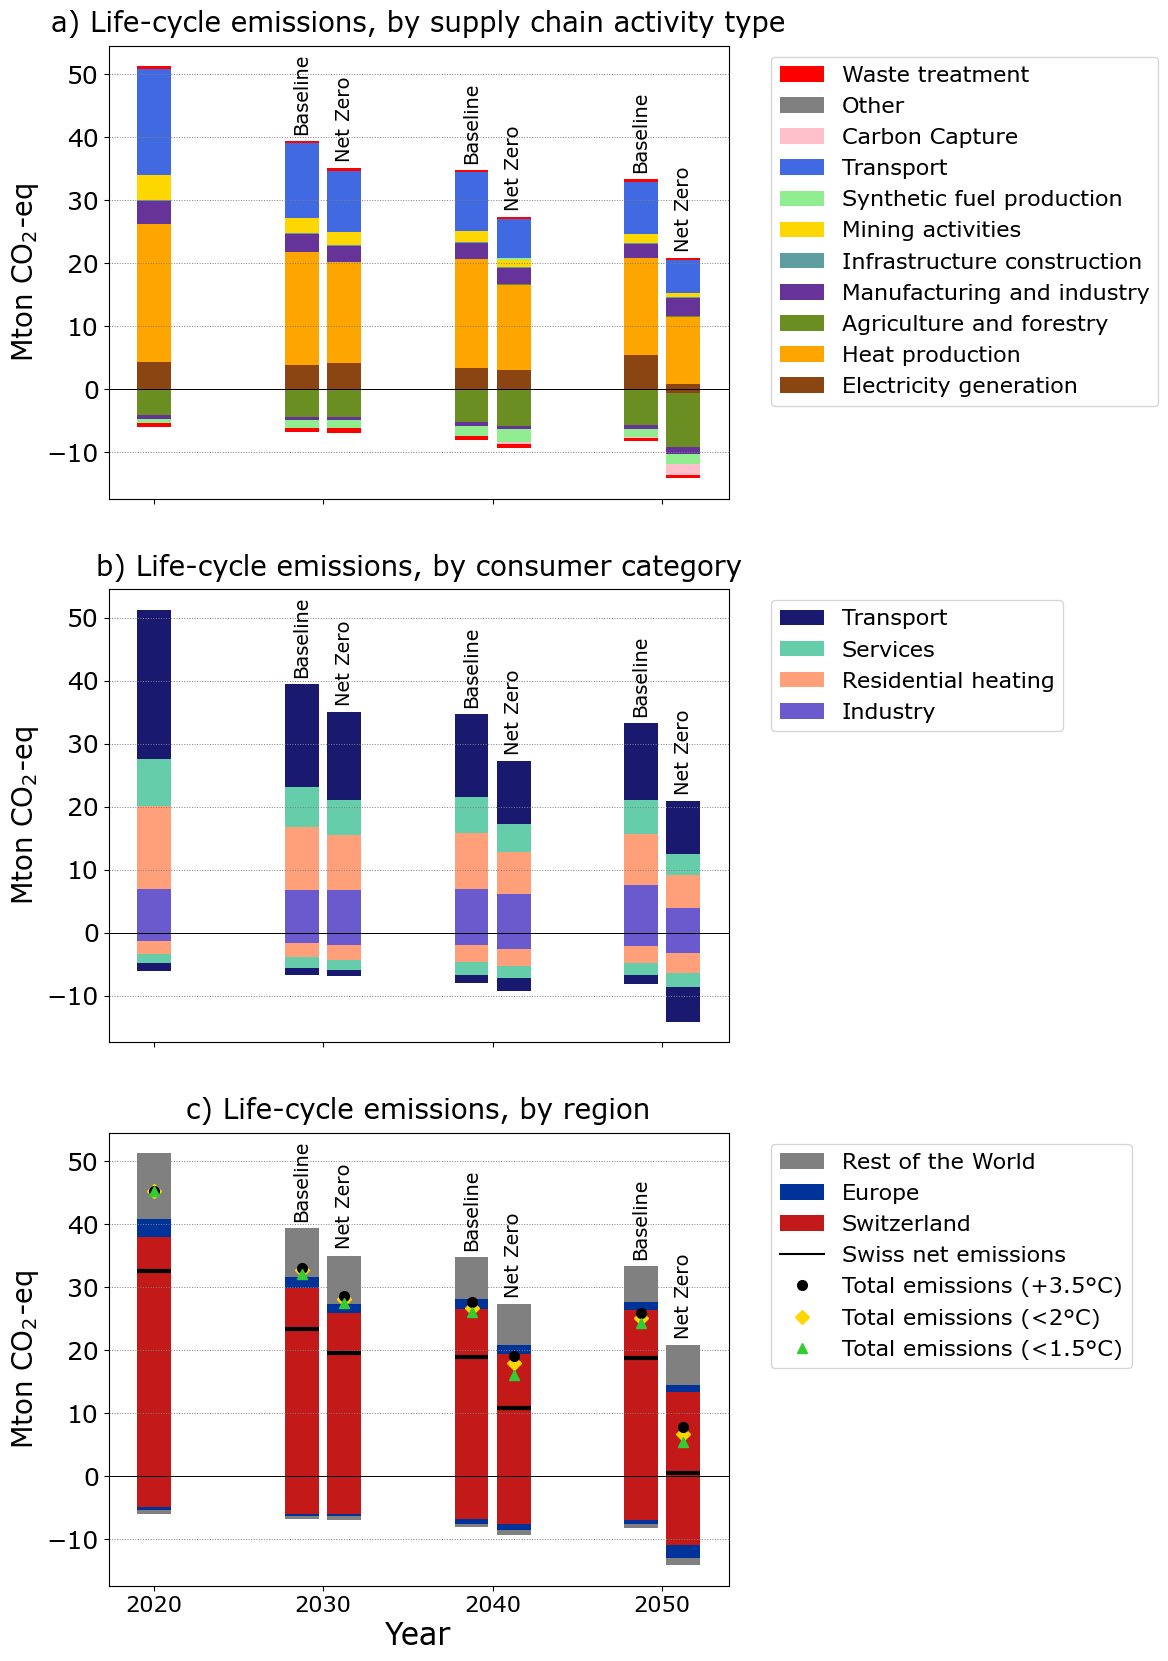

In [23]:
scenarios = [
    'SSP2-NPi-SPS1', 'SSP2-PkBudg500-SPS1', 'SSP2-Budg1150-SPS1',
    'SSP2-NPi-SPS4', 'SSP2-PkBudg500-SPS4', 'SSP2-Budg1150-SPS4'
]

# Filter data for specified years and scenarios
years = [2020, 2030, 2040, 2050]

filtered_data = all_emissions[(all_emissions['year'].isin(years)) & (all_emissions['scenario'].isin(scenarios))].copy()

# Convert values to billions
filtered_data['value'] = filtered_data['value'] / 1e9

# Apply the mapping to filtered_data before separating positive and negative values
label_mapping = {
    'CH': 'Switzerland',
    'EUR': 'Europe',
    'RoW': 'Rest of the World'
}
filtered_data['location'] = filtered_data['location'].map(label_mapping)

# Separate positive and negative values
pos_data = filtered_data[filtered_data['value'] >= 0]
neg_data = filtered_data[filtered_data['value'] < 0]

# Group and sum the separated data
top_data_pos = pos_data.groupby(['year', 'scenario', 'group'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
top_data_neg = neg_data.groupby(['year', 'scenario', 'group'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
middle_data_pos = pos_data.groupby(['year', 'scenario', 'act_category'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
middle_data_neg = neg_data.groupby(['year', 'scenario', 'act_category'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
bottom_data_pos = pos_data.groupby(['year', 'scenario', 'location'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
bottom_data_neg = neg_data.groupby(['year', 'scenario', 'location'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')

# Calculate net emissions for Switzerland for the specific scenarios
net_emissions_ch = (
    filtered_data[(filtered_data['location'] == 'Switzerland') & (filtered_data['scenario'].isin(['SSP2-Budg1150-SPS4', 'SSP2-Budg1150-SPS1']))].groupby(['year', 'scenario'])['value'].sum() +
    bottom_data_neg[(bottom_data_neg['location'] == 'Europe') & (bottom_data_neg['scenario'].isin(['SSP2-Budg1150-SPS4', 'SSP2-Budg1150-SPS1']))].groupby(['year', 'scenario'])['value'].sum()
).reset_index()

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 20), sharex=True)
bar_width = 0.2

# Function to create stacked bar plot with positive and negative values
def stacked_bar_plot(ax, data_pos, data_neg, category, hue_order, color_dict, bar_width=bar_width):
    hue_order = list(hue_order)  # Ensure hue_order is a list
    unique_years = sorted(data_pos['year'].unique())
    width = bar_width

    added_labels = set()  # To track labels added to the legend

    totals = {year: {scenario: 0 for scenario in scenarios} for year in unique_years}

    for i, year in enumerate(unique_years):
        for j, scenario in enumerate(['SSP2-Budg1150-SPS4', 'SSP2-Budg1150-SPS1']):
            if year == 2020 and j == 1:
                continue  # Skip the second bar for 2020
            subset_pos = data_pos[(data_pos['year'] == year) & (data_pos['scenario'] == scenario)]
            subset_neg = data_neg[(data_neg['year'] == year) & (data_neg['scenario'] == scenario)]
            bottom_pos = 0
            bottom_neg = 0
            for hue in hue_order:
                value_pos = subset_pos[subset_pos[category] == hue]['value'].sum()
                value_neg = subset_neg[subset_neg[category] == hue]['value'].sum()
                if year == 2020:
                    x = i  # Center the single 2020 bar
                else:
                    x = i + (j - 0.5) * (width + 0.05)  # Align x-ticks between bars
                if value_pos > 0:
                    label = hue if hue not in added_labels else ""
                    ax.bar(x, value_pos, width, bottom=bottom_pos, label=label, color=color_dict[hue])
                    bottom_pos += value_pos
                    totals[year][scenario] += value_pos
                    added_labels.add(hue)
                if value_neg < 0:
                    label = hue if hue not in added_labels else ""
                    ax.bar(x, value_neg, width, bottom=bottom_neg, label=label, color=color_dict[hue])
                    bottom_neg += value_neg
                    totals[year][scenario] += value_neg
                    added_labels.add(hue)

            # Add annotations for Baseline and Net Zero after plotting the full stack
            if year != 2020:
                if j == 0:  # Left bar (Baseline)
                    ax.text(x, bottom_pos + 1, 'Baseline', ha='center', va='bottom', rotation=90, fontsize=14)
                else:  # Right bar (Net Zero)
                    ax.text(x, bottom_pos + 1, 'Net Zero', ha='center', va='bottom', rotation=90, fontsize=14)

    return totals

# Top plot (by activity category)
stacked_bar_plot(ax1, middle_data_pos, middle_data_neg, 'act_category', hue_order_middle, custom_colors)
ax1.set_title('a) Life-cycle emissions, by supply chain activity type', fontsize=20, pad=10)
ax1.set_ylabel('Mton CO$_2$-eq', fontsize=20)
ax1.tick_params(axis='y', labelsize=18)
# Legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend_order = [by_label[hue] for hue in list(reversed(hue_order_middle)) if hue in by_label]
ax1.legend(legend_order, list(reversed(hue_order_middle)), bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, which='both', axis='y', linestyle=':', color='grey', linewidth=0.7)
ax1.axhline(0, color='black', linewidth=0.7)  # Add a continuous line at y=0
ax1.yaxis.set_major_locator(plt.MultipleLocator(10))  # Set y-ticks every 5 units

# Middle plot (by consumer category)
stacked_bar_plot(ax2, top_data_pos, top_data_neg, 'group', hue_order_top, custom_colors)
ax2.set_title('b) Life-cycle emissions, by consumer category', fontsize=20, pad=10)
ax2.set_ylabel('Mton CO$_2$-eq', fontsize=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=20)

# Legend
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend_order = [by_label[hue] for hue in list(reversed(hue_order_top)) if hue in by_label]
ax2.legend(legend_order, list(reversed(hue_order_top)), bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, which='both', axis='y', linestyle=':', color='grey', linewidth=0.7)
ax2.axhline(0, color='black', linewidth=0.7)  # Add a continuous line at y=0
ax2.yaxis.set_major_locator(plt.MultipleLocator(10))  # Set y-ticks every 5 units

# Bottom plot (by region)
totals = stacked_bar_plot(ax3, bottom_data_pos, bottom_data_neg, 'location', hue_order_bottom, custom_colors, bar_width=bar_width)
ax3.set_title('c) Life-cycle emissions, by region', fontsize=20, pad=10)
ax3.set_ylabel('Mton CO$_2$-eq', fontsize=20)
ax3.tick_params(axis='y', labelsize=18)
# Add net emissions lines for CH
plotted_scenarios = set()
for _, row in net_emissions_ch.iterrows():
    year_idx = years.index(row['year'])
    scenario_idx = 0 if row['scenario'].endswith('SPS4') else 1
    if row['year'] == 2020:
        x = year_idx  # Center the line for 2020
        if '2020' not in plotted_scenarios:
            ax3.hlines(row['value'], xmin=x-bar_width/2, xmax=x+bar_width/2, color='black', linewidth=3, label='Swiss net emissions')
            plotted_scenarios.add('2020')
    else:
        x = year_idx + (scenario_idx - 0.5) * (bar_width + 0.05)
        if (row['year'], row['scenario']) not in plotted_scenarios:
            ax3.hlines(row['value'], xmin=x-bar_width/2, xmax=x+bar_width/2, color='black', linewidth=3, label='Swiss net emissions' if len(plotted_scenarios) == 0 else "")
            plotted_scenarios.add((row['year'], row['scenario']))

for i, year in enumerate(years):
    for j, scenario in enumerate(['SSP2-Budg1150-SPS4', 'SSP2-Budg1150-SPS1']):
        if year == 2020 and j == 1:
            continue  # Skip the second bar for 2020
        if year == 2020:
            x = i  # Center the single 2020 bar
        else:
            x = i + (j - 0.5) * (bar_width + 0.05)
        for marker_scenario in ['SSP2-Budg1150', 'SSP2-NPi', 'SSP2-PkBudg500']:
            full_scenario = f'{marker_scenario}-{scenario.split("-")[-1]}'
            pos_value = bottom_data_pos[(bottom_data_pos['year'] == year) & (bottom_data_pos['scenario'] == full_scenario)]['value'].sum()
            neg_value = bottom_data_neg[(bottom_data_neg['year'] == year) & (bottom_data_neg['scenario'] == full_scenario)]['value'].sum()
            y = pos_value + neg_value
            marker_style = marker_styles[marker_scenario]
            ax3.plot(x, y, marker=marker_style['marker'], color=marker_style['color'], markersize=7, label=marker_style['label'] if i == 0 and j == 0 else '_nolegend_')


# Legend
handles, labels = ax3.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Ensure unique labels

for marker_scenario, style in marker_styles.items():
    unique_labels[style['label']] = plt.Line2D([0], [0], marker=style['marker'], color=style['color'], linestyle='', markersize=7, label=style['label'])

# Add the Net emissions line to the legend
unique_labels['Swiss net emissions'] = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, label='Swiss net emissions')

legend_order = [unique_labels[hue] for hue in list(reversed(hue_order_bottom)) if hue in unique_labels]
legend_order += [unique_labels['Swiss net emissions']]  # Add Swiss net emissions at the end
legend_order += [unique_labels[marker_styles[marker]['label']] for marker in marker_styles if marker_styles[marker]['label'] in unique_labels]

ax3.legend(legend_order, [label for label in list(reversed(hue_order_bottom)) + ['Swiss net emissions'] + [marker_styles[marker]['label'] for marker in marker_styles]], bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, which='both', axis='y', linestyle=':', color='grey', linewidth=0.7)
ax3.axhline(0, color='black', linewidth=0.7)  # Add a continuous line at y=0
ax3.yaxis.set_major_locator(plt.MultipleLocator(10))  # Set y-ticks every 5 units
ax3.set_xlabel('Year', fontsize=22)

plt.xticks(range(len(years)), years)

# Save and show the figure
plt.savefig('Figure_2_aggregated_swapped.png', dpi=300, bbox_inches='tight')
plt.show()
